In [1]:
import pandas as pd
import numpy as np

import datetime


In [2]:
df = pd.read_csv("../raw_data/SM_ELEC_METER_HST_202309251814.csv", usecols=[0, 1, 3, 5])
df

,HOUSE_ID_DONG,HOUSE_ID_HO_PRE,METER_DATE,ELEC_INST_EFF
0,561,10,2022-07-18 00:00:25,190
1,561,10,2022-07-18 00:10:25,191
2,561,10,2022-07-18 00:20:25,153
3,561,10,2022-07-18 00:30:19,231
4,561,10,2022-07-18 00:40:28,169
...,...,...,...,...
19969705,563,23,2023-08-30 10:30:08,319
19969706,563,23,2023-08-30 10:40:08,192
19969707,563,23,2023-08-30 10:40:08,185
19969708,563,23,2023-08-30 10:40:08,308


In [3]:
df.columns = ["BUILDING", "FLOOR", "TIMESTAMP", "CONSUMPTION(W)"]
df

,BUILDING,FLOOR,TIMESTAMP,CONSUMPTION(W)
0,561,10,2022-07-18 00:00:25,190
1,561,10,2022-07-18 00:10:25,191
2,561,10,2022-07-18 00:20:25,153
3,561,10,2022-07-18 00:30:19,231
4,561,10,2022-07-18 00:40:28,169
...,...,...,...,...
19969705,563,23,2023-08-30 10:30:08,319
19969706,563,23,2023-08-30 10:40:08,192
19969707,563,23,2023-08-30 10:40:08,185
19969708,563,23,2023-08-30 10:40:08,308


<Axes: >

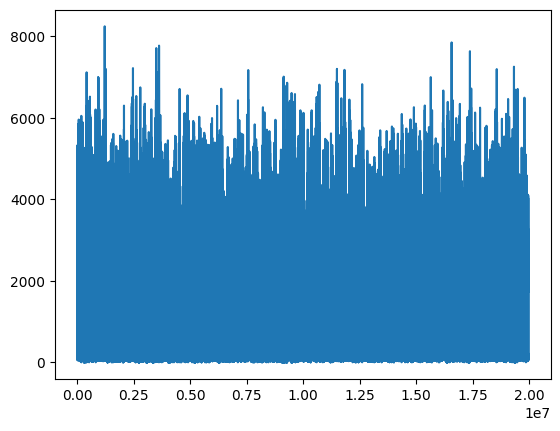

In [4]:
df[:]["CONSUMPTION(W)"].plot()

In [5]:
df['TIMESTAMP'] = pd.to_datetime(df['TIMESTAMP'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19969710 entries, 0 to 19969709
Data columns (total 4 columns):
 #   Column          Dtype         
---  ------          -----         
 0   BUILDING        int64         
 1   FLOOR           int64         
 2   TIMESTAMP       datetime64[ns]
 3   CONSUMPTION(W)  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 609.4 MB


In [6]:
df.isna().sum()

BUILDING          0
FLOOR             0
TIMESTAMP         0
CONSUMPTION(W)    0
dtype: int64

In [7]:
for i, row in df.iterrows():
    df.at[i,'TIMESTAMP'] = row['TIMESTAMP'].replace(second = 0)
    
df

,BUILDING,FLOOR,TIMESTAMP,CONSUMPTION(W)
0,561,10,2022-07-18 00:00:00,190
1,561,10,2022-07-18 00:10:00,191
2,561,10,2022-07-18 00:20:00,153
3,561,10,2022-07-18 00:30:00,231
4,561,10,2022-07-18 00:40:00,169
...,...,...,...,...
19969705,563,23,2023-08-30 10:30:00,319
19969706,563,23,2023-08-30 10:40:00,192
19969707,563,23,2023-08-30 10:40:00,185
19969708,563,23,2023-08-30 10:40:00,308


<Axes: >

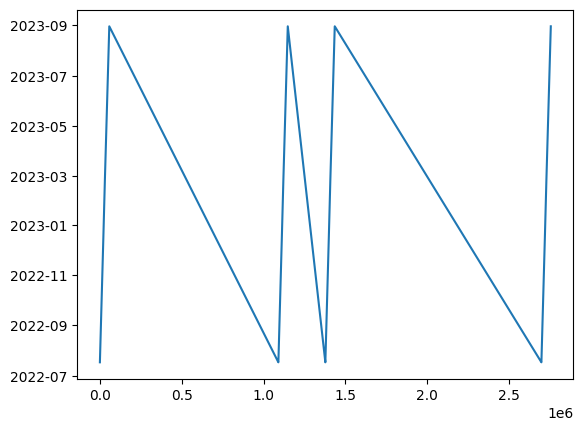

In [8]:
df.query("`BUILDING` == 561 & `FLOOR` == 10")['TIMESTAMP'].plot()

<Axes: >

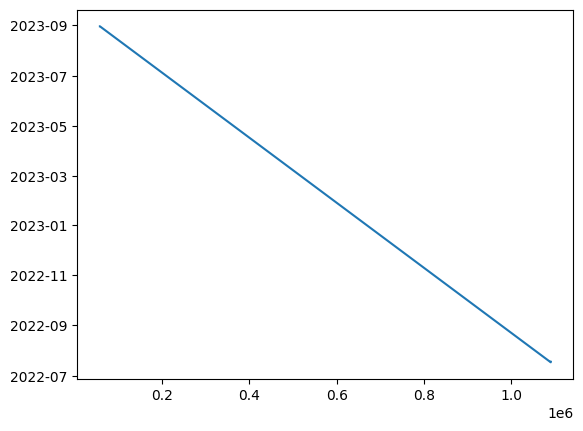

In [9]:
df.query("`BUILDING` == 561 & `FLOOR` == 10")[57400:57500]['TIMESTAMP'].plot()

<Axes: >

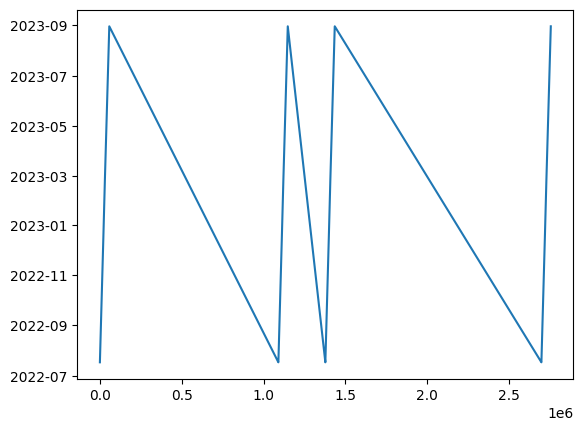

In [10]:
df_561_10 = df.query("`BUILDING` == 561 & `FLOOR` == 10")
df_561_10['TIMESTAMP'].plot()

<Axes: >

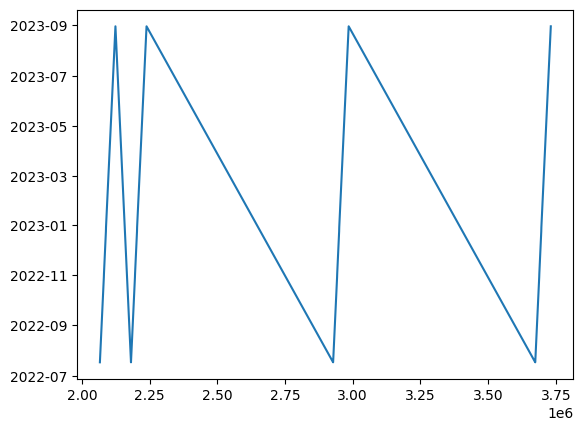

In [11]:
df.query("`BUILDING` == 561 & `FLOOR` == 4")['TIMESTAMP'].plot()

<Axes: >

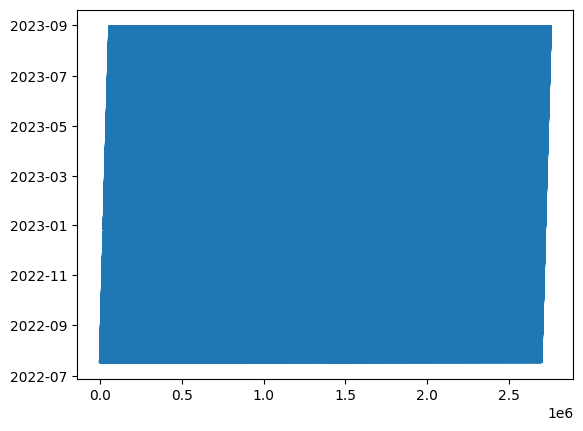

In [12]:
test = df_561_10.sort_values(by='TIMESTAMP')
test['TIMESTAMP'].plot()

In [13]:
test.head(50)

,BUILDING,FLOOR,TIMESTAMP,CONSUMPTION(W)
0,561,10,2022-07-18 00:00:00,190
1377841,561,10,2022-07-18 00:00:00,165
2698237,561,10,2022-07-18 00:00:00,603
1090773,561,10,2022-07-18 00:00:00,264
2698238,561,10,2022-07-18 00:10:00,551
1090774,561,10,2022-07-18 00:10:00,107
1377842,561,10,2022-07-18 00:10:00,138
1,561,10,2022-07-18 00:10:00,191
2698239,561,10,2022-07-18 00:20:00,916
1377843,561,10,2022-07-18 00:20:00,317


In [14]:
end_time = df_561_10.tail(1)['TIMESTAMP'].item()
end_time

Timestamp('2023-08-30 10:40:00')

In [24]:
df_561_10.query('`TIMESTAMP` == @end_time')

,BUILDING,FLOOR,TIMESTAMP,CONSUMPTION(W)
57399,561,10,2023-08-30 10:40:00,144
57400,561,10,2023-08-30 10:40:00,138
57401,561,10,2023-08-30 10:40:00,168
57402,561,10,2023-08-30 10:40:00,121
1148186,561,10,2023-08-30 10:40:00,141
1148187,561,10,2023-08-30 10:40:00,133
1148188,561,10,2023-08-30 10:40:00,184
1148189,561,10,2023-08-30 10:40:00,31
1435255,561,10,2023-08-30 10:40:00,484
1435256,561,10,2023-08-30 10:40:00,227


In [16]:
df.query("`BUILDING` == 561")['FLOOR'].drop_duplicates().sort_values()

1205603     1
401852      2
114814      3
2066740     4
1550095     5
574092      6
516681      7
172208      8
688893      9
0          10
803716     11
57403      12
459272     13
1664918    14
861129     15
229613     16
287025     17
344439     18
Name: FLOOR, dtype: int64

In [17]:
df.query("`BUILDING` == 562")['FLOOR'].drop_duplicates().sort_values()

6997122     1
5393484     2
4362600     3
4190771     4
4878039     5
5737321     6
5565350     7
4820756     8
5450774     9
4133481    10
5622644    11
4305362    12
4419874    13
5966195    14
6252504    15
4992676    16
4649038    17
5279002    18
4534576    19
4248067    20
5107092    21
4591747    22
6538973    23
7799107    24
Name: FLOOR, dtype: int64

In [18]:
df.query("`BUILDING` == 563")['FLOOR'].drop_duplicates().sort_values()

14907002     1
13299696     2
12266375     3
12094153     4
12783017     5
13644125     6
13471891     7
12725626     8
13357092     9
12036750    10
13529305    11
12208967    12
12323771    13
13873756    14
14160755    15
12897838    16
12553396    17
13184882    18
12438581    19
12151558    20
13012663    21
12495995    22
15653338    23
14447760    24
Name: FLOOR, dtype: int64

<Axes: >

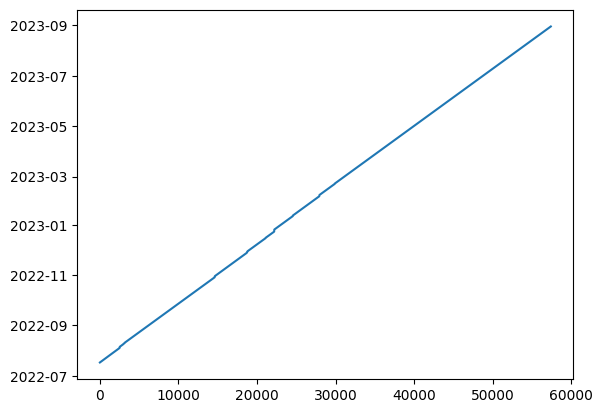

In [19]:
df_561_10[:57399]['TIMESTAMP'].plot()

In [20]:
buildings = df['BUILDING'].drop_duplicates().values

In [21]:
floors = df.query("`BUILDING` == @buildings[0]")['FLOOR'].drop_duplicates().sort_values().values

In [22]:
for b in buildings:
    print(f"`BUILDING` == @buildings[{b}]")

`BUILDING` == @buildings[561]
`BUILDING` == @buildings[562]
`BUILDING` == @buildings[563]


In [23]:
END_TIME = df.tail(1)['TIMESTAMP'].values[0]
END_TIME

numpy.datetime64('2023-08-30T10:40:00.000000000')

In [25]:
df.query("`TIMESTAMP` == @END_TIME").iloc[0].name

57399

In [26]:
df.query("`index` == 1000")

,BUILDING,FLOOR,TIMESTAMP,CONSUMPTION(W)
1000,561,10,2022-07-25 01:30:00,2137


In [27]:
df.iloc[0]['TIMESTAMP']

Timestamp('2022-07-18 00:00:00')

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19969710 entries, 0 to 19969709
Data columns (total 4 columns):
 #   Column          Dtype         
---  ------          -----         
 0   BUILDING        int64         
 1   FLOOR           int64         
 2   TIMESTAMP       datetime64[ns]
 3   CONSUMPTION(W)  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 609.4 MB


In [39]:
df.query(f"`BUILDING` == 561 and `FLOOR` == 10").info()

<class 'pandas.core.frame.DataFrame'>
Index: 229649 entries, 0 to 2755647
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   BUILDING        229649 non-null  int64         
 1   FLOOR           229649 non-null  int64         
 2   TIMESTAMP       229649 non-null  datetime64[ns]
 3   CONSUMPTION(W)  229649 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 8.8 MB


In [77]:
test_df = df.query(f"`BUILDING` == 561 and `FLOOR` == 1")

begin_idx = test_df.iloc[0].name
last_idx = test_df.query("`TIMESTAMP` == @END_TIME").iloc[0].name

test_df = df.iloc[begin_idx:last_idx + 1]
test_df = test_df.reset_index(drop=True)
test_df.loc[test_df.duplicated(['TIMESTAMP']).to_list()]
# test_df['TIMESTAMP'].plot()

,BUILDING,FLOOR,TIMESTAMP,CONSUMPTION(W)
175,561,1,2022-07-19 05:30:00,790
284,561,1,2022-07-19 23:40:00,411
1438,561,1,2022-07-28 02:00:00,922
1478,561,1,2022-07-28 08:40:00,443
1525,561,1,2022-07-28 16:40:00,668
...,...,...,...,...
29465,561,1,2023-02-17 01:20:00,652
29899,561,1,2023-02-20 01:40:00,321
29900,561,1,2023-02-20 01:40:00,345
29901,561,1,2023-02-20 01:40:00,752


<Axes: >

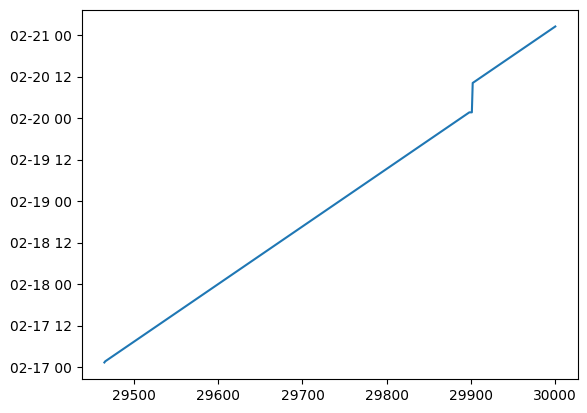

In [91]:
test_df.loc[29465 : 30000]['TIMESTAMP'].plot()

<Axes: >

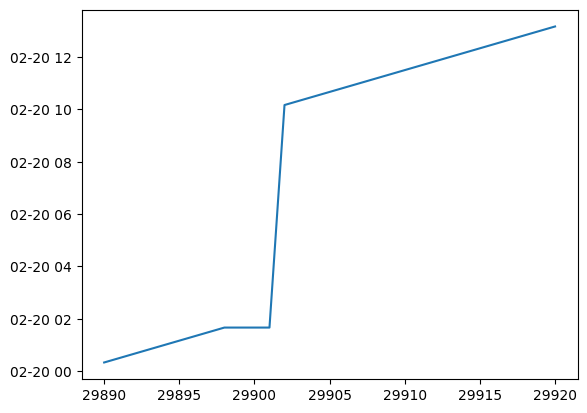

In [96]:
test_df.loc[29890 : 29920]['TIMESTAMP'].plot()

<Axes: >

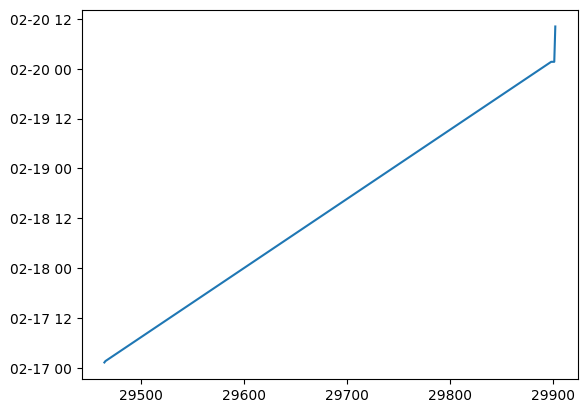

In [90]:
test_df.loc[29465 : 29902]['TIMESTAMP'].plot()

<Axes: >

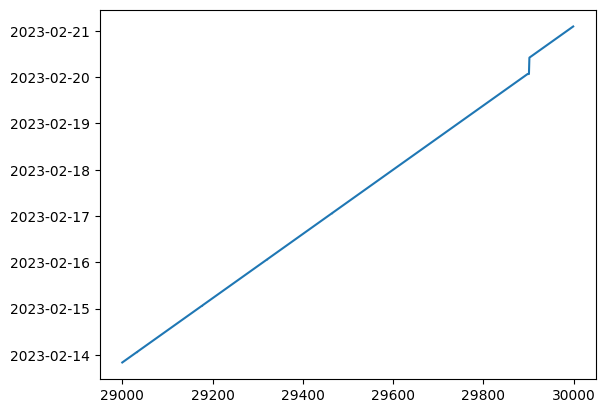

In [87]:
test_df.iloc[29000 : 30000]['TIMESTAMP'].plot()

In [62]:
final_df = pd.DataFrame({'BUILDING':[],	'FLOOR':[],	'TIMESTAMP':[],	'CONSUMPTION(W)':[]})

for b in buildings:
    floors = df.query(f"`BUILDING` == {b}")['FLOOR'].drop_duplicates().sort_values().values
    for f in floors:
        floor_df = df.query(f"`BUILDING` == {b} and `FLOOR` == {f}")

        begin_idx = floor_df.iloc[0].name
        last_idx = floor_df.query("`TIMESTAMP` == @END_TIME").iloc[0].name
        
        floor_df = df.iloc[begin_idx:last_idx + 1]

        #결측치 찾기
        missing_times = []
        time = df.iloc[begin_idx]['TIMESTAMP']
        i = 0
        while time <= END_TIME:
            if floor_df.iloc[i]['TIMESTAMP'] != time:
                i -= 1
                missing_times.append(time)
                append_df = pd.DataFrame({'BUILDING' : [b], 'FLOOR' : [f], 'TIMESTAMP' : [time], 'CONSUMPTION(W)' : [np.nan]})
                floor_df = pd.concat([floor_df,append_df], ignore_index = True)

            i += 1
            time += datetime.timedelta(minutes = 10)

        floor_df.reset_index(drop=True, inplace=True)
        floor_df.sort_values(by='TIMESTAMP', ascending=True, inplace=True)
        print(floor_df)

        print('결측치 갯수:', len(missing_times))
        
        #선형 보간하기

        print(f"보간 전 {b}동 {f}호 : " , floor_df.isna().sum())

        floor_df.interpolate(method = "time", inplace = True)

        print(f"보간 후 {b}동 {f}호 : " , floor_df.isna().sum())

        #최종 데이터프레임에 병합하기
        final_df = final_df.concat([final_df, floor_df], ignore_index = True)

        print(f"{b} 동 {f} 호 완료")




        BUILDING  FLOOR           TIMESTAMP  CONSUMPTION(W)
0            561      1 2022-07-18 00:00:00           948.0
1            561      1 2022-07-18 00:10:00           973.0
2            561      1 2022-07-18 00:20:00          1010.0
3            561      1 2022-07-18 00:30:00           794.0
4            561      1 2022-07-18 00:40:00           901.0
...          ...    ...                 ...             ...
116115       561      1 2023-08-30 10:20:00             NaN
116116       561      1 2023-08-30 10:30:00             NaN
57408        561      1 2023-08-30 10:30:00           547.0
57409        561      1 2023-08-30 10:40:00           490.0
116117       561      1 2023-08-30 10:40:00             NaN

[116118 rows x 4 columns]
결측치 갯수: 58708
보간 전 561동 1호 :  BUILDING              0
FLOOR                 0
TIMESTAMP             0
CONSUMPTION(W)    58708
dtype: int64


NotImplementedError: 

In [64]:
floor_df.tail(10)

,BUILDING,FLOOR,TIMESTAMP,CONSUMPTION(W)
57405,561,1,2023-08-30 10:00:00,354.0
116113,561,1,2023-08-30 10:00:00,NaN
57406,561,1,2023-08-30 10:10:00,387.0
116114,561,1,2023-08-30 10:10:00,NaN
57407,561,1,2023-08-30 10:20:00,505.0
116115,561,1,2023-08-30 10:20:00,NaN
116116,561,1,2023-08-30 10:30:00,NaN
57408,561,1,2023-08-30 10:30:00,547.0
57409,561,1,2023-08-30 10:40:00,490.0
116117,561,1,2023-08-30 10:40:00,NaN


In [ ]:
test_df = df.query("`BUILDING` == 561 and `FLOOR` == 1").